In [1]:
%%bash
python --version

Python 3.10.1


In [2]:
%%bash
conda env list

# conda environments:
#
                         /home/aji/anaconda2
                         /home/aji/anaconda2/envs/coevolution
base                     /home/aji/anaconda3
bmi219p                  /home/aji/anaconda3/envs/bmi219p
minipynetp               /home/aji/anaconda3/envs/minipynetp
openpyxl                 /home/aji/anaconda3/envs/openpyxl
pynetp                   /home/aji/anaconda3/envs/pynetp
pynetp3.10.0          *  /home/aji/anaconda3/envs/pynetp3.10.0
pytorch                  /home/aji/anaconda3/envs/pytorch
sciProj                  /home/aji/anaconda3/envs/sciProj
testenv                  /home/aji/anaconda3/envs/testenv
xlrd                     /home/aji/anaconda3/envs/xlrd
                         /home/aji/yes



In [1]:
from pyext.src.typedefs import (
    GeneID,
    Matrix,
    Vector
)

from PlotBioGridStatsLib import (
    jbuild,
    get_matrix_col_minus_s,
    prepare_biogrid,
    load_tip49_spec_counts_dataset,
    plot_col,
    plot_physical_experiments,
    find_idmapping_overlap,
    filter_biogrid,
    ProteinName,
    Any,
    DataFrame,
    Array
)

from pyext.src.jittools import is_jittable
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
from pathlib import Path
from functools import partial
from typing import Any, Callable, NewType
import graphviz
import inspect
import scipy

import PlotBioGridStatsLib as nblib
from sklearn.metrics import roc_curve, precision_recall_curve

In [2]:
#Dev zone
key = jax.random.PRNGKey(7)
theta, phi, X, p, n= nblib.dev_get_dev_state_poisson_sqr()



In [12]:
assert jnp.all(theta[0:0] == jnp.array([]))

In [4]:

def test_eta1_eta2_jittable():
    for i in range(0, len(X)):
        x_i = X[:, i]
        jget_eta1 = jax.jit(nblib.get_eta1)
        jget_eta2 = partial(nblib.get_eta2, p=p)
        jget_eta2 = jax.jit(jget_eta2)

        for s in range(p+1):
            print(jget_eta1(phi, s))
            print(jget_eta2(theta, phi, x_i, s))

0.7966835
18.016562
0.03250108
-2.0849602
1.1178136
17.069918
0.47894335
-0.3869666
0.70482236
-9.642161
0.7966835
11.967922
0.7966835
19.541555
0.03250108
-5.0221434
1.1178136
14.48901
0.47894335
4.2844543
0.70482236
-8.942242
0.7966835
12.890726
0.7966835
19.39685
0.03250108
-2.003231
1.1178136
17.826956
0.47894335
-1.4883349
0.70482236
-10.134328
0.7966835
13.561778
0.7966835
19.39685
0.03250108
-2.003231
1.1178136
17.826956
0.47894335
-1.4883349
0.70482236
-10.134328
0.7966835
13.561778
0.7966835
19.39685
0.03250108
-2.003231
1.1178136
17.826956
0.47894335
-1.4883349
0.70482236
-10.134328
0.7966835
13.561778


In [9]:
# matmul test

a = np.arange(20)
b = a * np.arange(20)

(36100, 36100)

In [4]:
# load biogrid data
dpath = Path("../data/biogrid/BIOGRID-ALL-4.4.206.tab3.txt")
biogrid = prepare_biogrid(dpath)

/home/aji/Projects/dev/pynet/devel/PlotBioGridStatsLib.py:151: DtypeWarning: Columns (1,2,18) have mixed types.Specify dtype option on import or set low_memory=False.
  d = load_biogrid_v4_4(dpath)


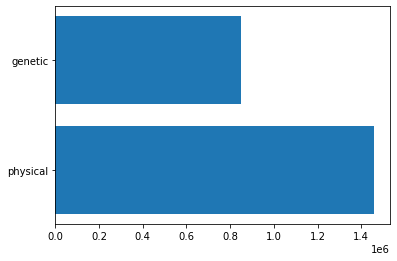

In [5]:
plot_col(biogrid,'Experimental System Type' )

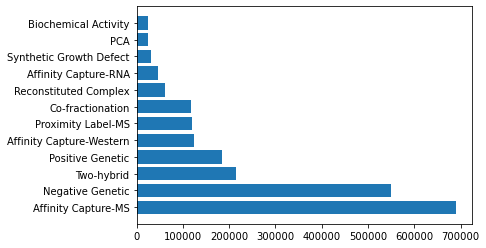

In [6]:
plot_col(biogrid, 'Experimental System', topn=12)

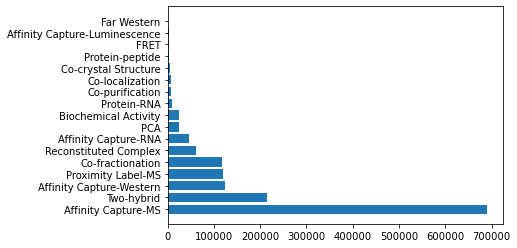

In [7]:
plot_physical_experiments(biogrid)

In [8]:
# load in the spectral counts data
spec_counts_df = load_tip49_spec_counts_dataset()

In [9]:
# returns None
find_idmapping_overlap(biogrid, spec_counts_df)

dhuman (923629, 17)
dhuman (913180, 17)
0/27 searching INO80D
1/27 searching C20ORF20
2/27 searching ACTR8
3/27 searching ACTR5
4/27 searching UXT
5/27 searching INO80C
6/27 searching RUVBL2
7/27 searching WDR92
8/27 searching SRCAP
9/27 searching RP11-529I10.4
10/27 searching INO80B
11/27 searching ZNHIT1
12/27 searching POLR2E
13/27 searching KIAA0515
14/27 searching C12ORF41
15/27 searching H2AFZ
16/27 searching NUFIP1
17/27 searching TFPT
18/27 searching LIN9
19/27 searching INO80E
20/27 searching PIH1D1
21/27 searching TP53
22/27 searching ZNHIT6
23/27 searching RUVBL1
24/27 searching ACTR6
25/27 searching VPS72
26/27 searching ZNHIT2
0/1207 searching CLASP2
1/1207 searching PRDX2
2/1207 searching TEX10
3/1207 searching C12ORF11
4/1207 searching POLR2C
5/1207 searching RPL23
6/1207 searching MCTS1
7/1207 searching RPRD2
8/1207 searching BRCC3
9/1207 searching CPSF3
10/1207 searching KIAA1967
11/1207 searching MCM6
12/1207 searching CSTF1
13/1207 searching TF
14/1207 searching PON2

In [10]:
#Filters out non tip49 entires
biogrid = filter_biogrid(spec_counts_df, biogrid)
tip49biogrid = biogrid
del biogrid

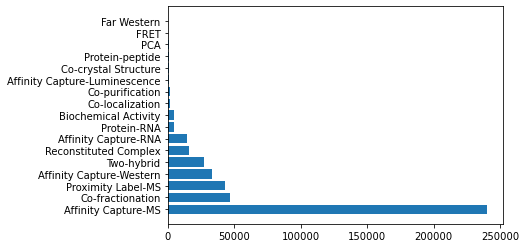

In [12]:
plot_physical_experiments(tip49biogrid)

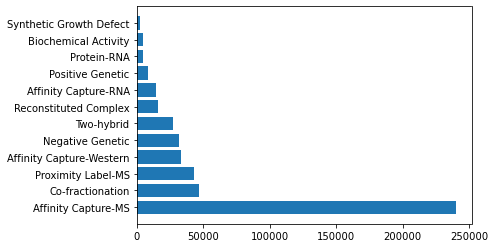

In [13]:
plot_col(tip49biogrid, 'Experimental System')

In [14]:
spec_counts_df

,Bait,Prey,IP,Spec,ctrlCounts,SAINT,PP-NSAF,Z-score,weighted D-score
2,ACTR5,ACTR5,ARP5,417,0|0|0|0|0|0|0|0|0,1,0.697316352520067,4.93341427067021,7.32386764271932
3,ACTR5,RUVBL2,ARP5,73,6|0|1|0|0|0|0|0|0,1,0.033910239152529,-0.277434577751575,2.30143615423011
4,ACTR5,RUVBL1,ARP5,50,3|2|0|0|0|0|0|2|0,1,0.0188476130319074,-0.445655245594782,1.6953802173525
5,ACTR5,INO80C,ARP5,26,0|0|0|0|0|0|0|0|0,0.99,0.17716503039295,2.47752757446183,2.16103341761436
6,ACTR5,ACTR8,ARP5,32,0|0|0|0|0|0|0|0|0,1,0.0326314267664079,0.101163744000279,2.1299377904367
...,...,...,...,...,...,...,...,...,...
5518,ZNHIT2,ZNHIT2,ZnF.HIT2,358,0|0|0|0|0|0|0|0|0,1,0.95751746168747,5.00260255351579,13.7777734271275
5519,ZNHIT2,C20ORF4,ZnF.HIT2,4,0|0|0|0|0|0|0|0|0,0.97,1,5.00370233297676,1.7133212483779
5520,ZNHIT2,TSSC4,ZnF.HIT2,4,0|0|0|0|0|0|0|0|0,0.98,1,5.00370233297676,1.7133212483779
5521,ZNHIT2,TTC27,ZnF.HIT2,9,0|0|0|0|0|0|0|0|0,0.99,1,5.00370233297676,2.42300214615802


In [15]:
tip49biogrid

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,Synonyms Interactor B,Experimental System,Experimental System Type,Author,Publication Source,Organism ID Interactor A,Organism ID Interactor B,Organism Name Interactor A,Organism Name Interactor B
8,663,54464,226,-,-,XRN1,ALDOA,SEP1,ALDA|GSD12|HEL-S-87p,Two-hybrid,physical,Lehner B (2004),PUBMED:15231747,9606,9606,Homo sapiens,Homo sapiens
16,1695,7916,2885,DADB-70P7.5,-,PRRC2A,GRB2,BAT2|D6S51|D6S51E|G2,ASH|EGFRBP-GRB2|Grb3-3|MST084|MSTP084|NCKAP2,Two-hybrid,physical,Lehner B (2004),PUBMED:14667819,9606,9606,Homo sapiens,Homo sapiens
18,1888,6521,22950,-,HLC3,SLC4A1,SLC4A1AP,AE1|BND3|CD233|DI|EMPB3|EPB3|FR|RTA1A|SW|WD|WD...,-,Two-hybrid,physical,Chen J (1998),PUBMED:9422766,9606,9606,Homo sapiens,Homo sapiens
22,2398,672,4436,-,-,BRCA1,MSH2,BRCAI|BRCC1|BROVCA1|FANCS|IRIS|PNCA4|PPP1R53|P...,COCA1|FCC1|HNPCC|HNPCC1|LCFS2,Two-hybrid,physical,Wang Q (2001),PUBMED:11498787,9606,9606,Homo sapiens,Homo sapiens
24,2424,672,2956,-,-,BRCA1,MSH6,BRCAI|BRCC1|BROVCA1|FANCS|IRIS|PNCA4|PPP1R53|P...,GTBP|GTMBP|HNPCC5|HSAP|p160,Two-hybrid,physical,Wang Q (2001),PUBMED:11498787,9606,9606,Homo sapiens,Homo sapiens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312690,3310222,283489,10459,-,RP3-330O12.4,CHAMP1,MAD2L2,C13orf8|CAMP|CHAMP|ZNF828,MAD2B|POLZ2|REV7,Affinity Capture-Western,physical,Hara K (2017),PUBMED:28887307,9606,9606,Homo sapiens,Homo sapiens
2312692,3310224,983,126353,-,-,CDK1,MISP,CDC2|CDC28A|P34CDC2,C19orf21,Biochemical Activity,physical,Maier B (2013),PUBMED:23574715,9606,9606,Homo sapiens,Homo sapiens
2312695,3310227,126353,22919,-,-,MISP,MAPRE1,C19orf21,EB1,Affinity Capture-Western,physical,Maier B (2013),PUBMED:23574715,9606,9606,Homo sapiens,Homo sapiens
2312696,3310228,1639,126353,-,-,DCTN1,MISP,DAP-150|DP-150|P135,C19orf21,Affinity Capture-Western,physical,Maier B (2013),PUBMED:23574715,9606,9606,Homo sapiens,Homo sapiens


In [18]:
query = tip49biogrid['Official Symbol Interactor A'].iloc[0:10]        

Annealed Importance Sampling of Poisson SQR Model
Index  $i$ ranges from $1$ to $N$ where $N$ is the number of weights $w^{(i)}$
and index $j$ ranges from $1$ to $n$ where $n$ is the number of intermediate distributions


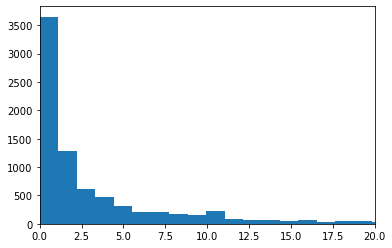

In [17]:
spec_counts = []
for i in spec_counts_df['Spec']:
    i = i.split('|')
    i = list(i)
    for j in i:
        j = int(j)
        spec_counts.append(j)
        
spec_counts = np.array(spec_counts)
plt.hist(spec_counts, bins=1000)
#plt.xticks([0, 50, 100, 150])
plt.xlim(0, 20)
plt.show()

False